In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import tensorflow as tf
import os
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split

In [3]:
# Load the data
boston = load_boston()
boston.keys()

data = DataFrame(boston['data'])
labels = DataFrame(boston['target'])

In [4]:
# Normalize the data
scaler = StandardScaler().fit(data)
dataS = scaler.transform(data)
print(data.head(1))
print(dataS[1,:])
dataS.shape

        0     1     2    3      4      5     6     7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.09  1.0  296.0  15.3   

      11    12  
0  396.9  4.98  
[-0.41526932 -0.48772236 -0.59338101 -0.27259857 -0.74026221  0.19427445
  0.36716642  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.44105193
 -0.49243937]


(506, 13)

In [5]:
# Add bias 
dataB = np.hstack(( np.ones((dataS.shape[0], 1)), dataS))
dataB.shape

(506, 14)

In [26]:
# Split into test train
xTrain, xTest, yTrain, yTest = train_test_split(dataB, labels, test_size = 0.2, random_state = 10)

In [27]:
# Init vars for ease of use later on
rows, cols = xTrain.shape

In [33]:
# Step one:  Create the TF CG

# Clear any old stuff hanging around
tf.reset_default_graph()

# Init vars
lr = 0.01
epochs =  501
history = []

# Place holders for the X and Y data, to be fed into the CG at run time
x = tf.placeholder(tf.float32, [None, cols], name = 'x')
y = tf.placeholder(tf.float32, [None, 1], name = 'y')

# Create a TF variable we can store values in for the weights, and init with ones
# yHat = wX + b
w = tf.Variable( tf.ones([cols, 1], name = 'w'))

# Outcomes
yH = tf.matmul(x, w)

# Loss
loss = tf.reduce_mean(tf.square(yH - y))

# Optimizer
optimize = tf.train.GradientDescentOptimizer(lr).minimize(loss)


In [34]:
# Step two:  Run the TF CG

# Create session and init all TF vars
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# Train the model
for e in range(epochs):
    sess.run([optimize], feed_dict = {x: xTrain, y: yTrain})
    history.append(sess.run([loss], feed_dict = {x: xTrain, y: yTrain}))
    

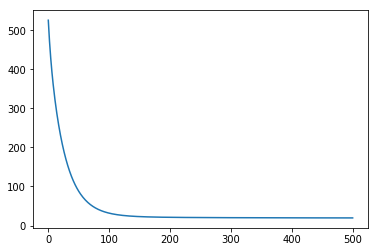

In [35]:
plt.plot(history)

In [31]:
# Step three: Predictions

# Run test data through forward pass
pred = sess.run([yH], feed_dict = {x: xTest})

# pred -> list
# labels -> DataFrame
# Convert labels to np.ndarray, so we can subtract them for MSE calc
mse = tf.reduce_mean(tf.square(pred - yTest.values))
print("MSE: %.4f" % sess.run(mse)) 

MSE: 34.4027


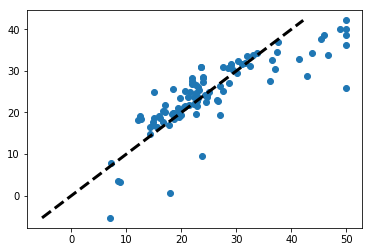

In [32]:
pred = np.array(pred)
fix, ax = plt.subplots()
ax.scatter(yTest, pred)
ax.plot([pred.min(),pred.max()], [pred.min(),pred.max()], 'k--', lw = 3)
plt.show()

In [18]:
sess.close()